In [4]:
import cv2
import numpy as np

In [ ]:

# def classify_and_annotate_video(video_path, output_image_path):
#     # Thresholds for time classification based on brightness (Value channel in HSV)
#     thresholds = {
#         "Day": (170, 255),  # Bright frames
#         "Evening": (100, 169),  # Moderate brightness
#         "Night": (0, 99),  # Dark frames
#         "Morning": (120, 200),  # Optional adjustment for early morning
#     }

#     # Initialize counters for each time period and representative frames
#     counts = {key: 0 for key in thresholds.keys()}
#     total_frames = 0
#     representative_frames = {key: None for key in thresholds.keys()}

#     # Open the video file
#     cap = cv2.VideoCapture(video_path)
#     if not cap.isOpened():
#         print("Error: Cannot open video file.")
#         return

#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Convert frame to HSV
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         brightness = np.mean(hsv[:, :, 2])  # Mean of Value channel

#         # Classify frame based on brightness
#         for label, (low, high) in thresholds.items():
#             if low <= brightness <= high:
#                 counts[label] += 1
#                 # Save the first representative frame for each category
#                 if representative_frames[label] is None:
#                     representative_frames[label] = frame
#                 break

#         total_frames += 1

#     cap.release()

#     # Calculate percentages for each category
#     percentages = {key: (count / total_frames) * 100 for key, count in counts.items()}

#     # Annotate an image with results
#     annotated_image = None
#     y_offset = 50
#     text_color = (255, 255, 255)  # White text
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     font_scale = 1
#     font_thickness = 2

#     for label, frame in representative_frames.items():
#         if frame is not None:
#             # Resize the representative frame
#             resized_frame = cv2.resize(frame, (400, 300))
#             # Add text annotation
#             text = f"{label}: {percentages[label]:.2f}%"
#             cv2.putText(resized_frame, text, (10, 30), font, font_scale, text_color, font_thickness)
#             # Stack frames vertically for the annotated output
#             if annotated_image is None:
#                 annotated_image = resized_frame
#             else:
#                 annotated_image = cv2.vconcat([annotated_image, resized_frame])

#     # Save or display the annotated image
#     if annotated_image is not None:
#         cv2.imwrite(output_image_path, annotated_image)
#         print(f"Annotated image saved at: {output_image_path}")
#     else:
#         print("No frames were classified.")

# # Input video file path and output image path
# video_path = "Time-Lapse Clip_ Sunrise.mp4"  # Replace with your video file path
# output_image_path = "output.jpg"  # Replace with your desired output image path
# classify_and_annotate_video(video_path, output_image_path)


Annotated image saved at: output.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def capture_and_visualise(video_path):
    # Thresholds for time classification based on brightness (Value channel in HSV)
    thresholds = {
        "Day": (170, 255),  # Bright frames
        "Evening": (100, 169),  # Moderate brightness
        "Night": (0, 99),  # Dark frames
        "Morning": (120, 200),  # Optional adjustment for early morning
    }

    # Initialize counters for each time period and representative frames
    counts = {key: 0 for key in thresholds.keys()}
    total_frames = 0
    representative_frames = {key: None for key in thresholds.keys()}

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Cannot open video file.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        brightness = np.mean(hsv[:, :, 2])  # Mean of Value channel

        # Classify frame based on brightness
        for label, (low, high) in thresholds.items():
            if low <= brightness <= high:
                counts[label] += 1
                # Save the first representative frame for each category
                if representative_frames[label] is None:
                    representative_frames[label] = frame
                break

        total_frames += 1

    cap.release()

    # Calculate percentages for each category
    percentages = {key: (count / total_frames) * 100 for key, count in counts.items()}

    # Annotate and display representative frames
    annotated_images = []
    text_color = (255, 255, 255)  # White text
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2

    for label, frame in representative_frames.items():
        if frame is not None:
            # Resize the representative frame
            resized_frame = cv2.resize(frame, (400, 300))
            # Add text annotation
            text = f"{label}: {percentages[label]:.2f}%"
            cv2.putText(resized_frame, text, (10, 30), font, font_scale, text_color, font_thickness)
            annotated_images.append(resized_frame)

    if annotated_images:
        concatenated_image = cv2.vconcat(annotated_images)
        cv2.imshow("Annotated Frames", concatenated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No frames were classified.")

    # Generate and display a pie chart for the percentages
    labels = [key for key in thresholds.keys()]
    values = [percentages[key] for key in thresholds.keys()]
    colors = ['#FFD700', '#FF8C00', '#2F4F4F', '#87CEFA']  # Colors for Day, Evening, Night, Morning

    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title("Time Period Percentage Distribution")
    plt.show()

# Input video file path
video_path = "Time-Lapse Clip_ Sunrise.mp4"  # Replace with your video file path
capture_and_visualise("Time-Lapse Clip_ Sunrise.mp4")


Annotated image saved at: annotated_output.jpg
Chart image saved at: percentage_chart.png


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def capture_and_visualise_with_heatmap(video_path, output_image_path, chart_image_path, heatmap_path, color_overlay_path):
#     # Thresholds for time classification based on brightness (Value channel in HSV)
#     thresholds = {
#         "Day": (170, 255),  # Bright frames
#         "Evening": (100, 169),  # Moderate brightness
#         "Night": (0, 99),  # Dark frames
#         "Morning": (120, 200),  # Optional adjustment for early morning
#     }

#     # Colors for visualization
#     category_colors = {
#         "Day": (255, 223, 0),  # Yellow
#         "Evening": (255, 140, 0),  # Orange
#         "Night": (47, 79, 79),  # Dark Gray
#         "Morning": (135, 206, 250),  # Light Blue
#     }

#     # Initialize counters for each time period
#     counts = {key: 0 for key in thresholds.keys()}
#     total_frames = 0
#     frame_brightness_map = []  # Store brightness for heatmap
#     representative_frames = {key: None for key in thresholds.keys()}

#     # Open the video file
#     cap = cv2.VideoCapture(video_path)
#     if not cap.isOpened():
#         print("Error: Cannot open video file.")
#         return

#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Convert frame to HSV
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         brightness = np.mean(hsv[:, :, 2])  # Mean of Value channel
#         frame_brightness_map.append(brightness)

#         # Classify frame based on brightness
#         for label, (low, high) in thresholds.items():
#             if low <= brightness <= high:
#                 counts[label] += 1
#                 # Save the first representative frame for each category
#                 if representative_frames[label] is None:
#                     representative_frames[label] = frame
#                 break

#         total_frames += 1

#     cap.release()

#     # Calculate percentages for each category
#     percentages = {key: (count / total_frames) * 100 for key, count in counts.items()}

#     # Generate a heatmap of brightness over time
#     heatmap_data = np.array(frame_brightness_map).reshape(1, -1)
#     plt.figure(figsize=(12, 2))
#     plt.imshow(heatmap_data, aspect="auto", cmap="plasma", interpolation="nearest")
#     plt.colorbar(label="Brightness")
#     plt.title("Brightness Heatmap")
#     plt.xlabel("Frame Index")
#     plt.yticks([])  # Remove y-axis ticks for clarity
#     plt.savefig(heatmap_path)
#     plt.close()
#     print(f"Heatmap image saved at: {heatmap_path}")

#     # Create a color-overlay image for classification
#     color_overlay_image = None
#     for label, frame in representative_frames.items():
#         if frame is not None:
#             # Create a solid color block
#             overlay = np.full_like(frame, category_colors[label], dtype=np.uint8)
#             # Blend with representative frame
#             blended = cv2.addWeighted(frame, 0.5, overlay, 0.5, 0)
#             # Add text annotation
#             text = f"{label}: {percentages[label]:.2f}%"
#             cv2.putText(blended, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
#             # Stack images vertically
#             if color_overlay_image is None:
#                 color_overlay_image = blended
#             else:
#                 color_overlay_image = cv2.vconcat([color_overlay_image, blended])

#     # Save the color-overlay image
#     if color_overlay_image is not None:
#         cv2.imwrite(color_overlay_path, color_overlay_image)
#         print(f"Color overlay image saved at: {color_overlay_path}")

#     # Generate a pie chart for the percentages
#     labels = [key for key in thresholds.keys()]
#     values = [percentages[key] for key in thresholds.keys()]
#     colors = ['#FFD700', '#FF8C00', '#2F4F4F', '#87CEFA']  # Colors for Day, Evening, Night, Morning

#     plt.figure(figsize=(6, 6))
#     plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
#     plt.title("Time Period Percentage Distribution")
#     plt.savefig(chart_image_path)
#     plt.close()
#     print(f"Chart image saved at: {chart_image_path}")

# # Input video file path and output paths
# video_path = "riseandset.mp4"  # Replace with your video file path
# output_path = "annotated_output.jpg"  # Image with labeled frames
# chart_path = "percentage_chart.png"  # Pie chart representing percentages
# heatmap_path = "brightness_heatmap.png"  # Heatmap image
# color_overlay_path = "color_overlay_output.jpg"  # Color-overlay visualization

# capture_and_visualise_with_heatmap(video_path, output_path, chart_path, heatmap_path, color_overlay_path)


Heatmap image saved at: brightness_heatmap.png
Color overlay image saved at: color_overlay_output.jpg
Chart image saved at: percentage_chart.png


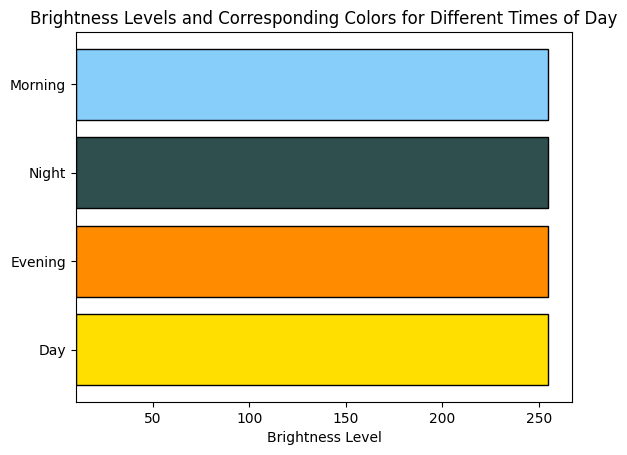

In [5]:
import matplotlib.pyplot as plt

# Data from the provided dictionaries
thresholds = {
    "Day": (10, 255),
    "Evening": (10, 255),
    "Night": (10, 255),
    "Morning": (10, 255),
}

category_colors = {
    "Day": (255, 223, 0),
    "Evening": (255, 140, 0),
    "Night": (47, 79, 79),
    "Morning": (135, 206, 250),
}

# Prepare data for visualization
categories = list(thresholds.keys())
brightness_ranges = [thresholds[category] for category in categories]
colors = [category_colors[category] for category in categories]

# Create a bar chart
fig, ax = plt.subplots()

for i, category in enumerate(categories):
    min_brightness, max_brightness = brightness_ranges[i]
    color = [c / 255 for c in colors[i]]  # Normalize RGB values to [0, 1] for Matplotlib
    ax.barh(category, max_brightness - min_brightness, left=min_brightness, color=color, edgecolor='black')

# Add labels and title
ax.set_xlabel('Brightness Level')
ax.set_title('Brightness Levels and Corresponding Colors for Different Times of Day')

# Show the plot
plt.show()